<br>
<img src="img/EscolaLivreIA.png" width="850" aling=central/>
<br>

# Aula: Teste de Hipóteses e Teorema de Bayes

Nesta aula iremos:

1. Abordar conceitos básicos de Estatítica
2. Apresentar o Teste de Hipóteses na teoria e na prática
3. Classificação com Naive Bayes (teste A/B Bayesiano)
4. Abordar o Teorema de Bayes e um exemplo prático de Classificação (wine)
5. Recomendação para praticar o Naive Bayes (Kaggle)

---------------

# 1. Estatística: Conceitos básicos

- **Viés**: Viés ou erro sistemático é a distorção sistemática entre a medida de uma variável estatística e o valor real da grandeza a estimar. A introdução de um viés no cálculo estatístico pode estar ligada quer a imperfeição ou deformação da amostra (estatística) que serve de base para a estimativa, quer ao próprio método de avaliação. Estudaremos **viés** na aula de **Inferência 2**.

- **Intervalos de confiança**:  Intervalo de confiança (IC) é um tipo de estimativa por intervalo de um parâmetro populacional desconhecido.

- **Testes de hipóteses**: ou teste de significância é um procedimento estatístico que permite tomar uma decisão (aceitar ou rejeitar a hipótese).

Vamos então aprofundar agora os conceitos de **intervalo de confiança** e **teste de hipótese**, e deixar viés para a próxima aula.

- **Curva Normal:**

Distribuição De-Moivre-Laplace-Gauss

Nos séculos dezoito e dezenove, alguns matemáticos e físicos desenvolveram uma função densidade de probabilidade que descrevia os erros experimentais obtidos em medidas físicas _Caire_, 2012. De certa forma todo e qualquer processo de mensuração está sujeito a um erro de medida. Esse erro pode ter diferentes fontes, desde a variação de tempertura, tempo, entre inúmeras outras características não identificáveis. Essa função densidade de probabilidade é curva conhecida como distribuição normal ou gaussina.

A grande utilidade dessa distribuição está associada ao fato de que aproxima de forma bastante satisfatória as curvas de frequências de medidas físicas.

<br>
<img src="img/normal.png" width="550" />
<br>

- **Desvio-Padrão:**

O desvio-padrão é uma formulação empírica para cálculo do padrão de desvio da série de dados. Para uma população, temos interesse em calcular o padrão de desvio da série com todos os valores observados deste população, através da raiz quadrada do quadrado da diferença entre cada observação e o valor médio. Para uma amostra, por definição, o desvio-padrão deve ser dividido pela razão do número de observações menos um, devido ao número dos graus de liberdade.

------------------

# 2. Teste de Hipóteses

## Parte Teórica

Teste de hipóteses, teste estatístico ou teste de significância é um procedimento estatístico que permite tomar uma decisão (aceitar ou rejeitar a hipótese nula ${H_0}$ entre duas ou mais hipóteses (geralmente adota-se hipótese nula ${H_0}$ e hipótese alternativa ${H_1}$), utilizando os dados observados de um determinado experimento. Há diversos métodos para realizar o teste de hipóteses, que incluem Fisher (teste de significância), o método de Neyman–Pearson, método de Bayes, e o método t-Student.

Por meio da teoria da probabilidade, é possível inferir sobre quantidades de interesse de uma população a partir de uma amostra observada de um experimento científico. Por exemplo, estimar pontualmente e de forma intervalar um parâmetro de interesse, testar se uma determinada teoria científica deve ser descartada, verificar se um lote de remédios deve ser devolvido por falta de qualidade, entre outros. Por meio do rigor matemático, a inferência estatística pode ser utilizada para auxiliar a tomada de decisões nas mais variadas áreas.

<br>
<img src="img/aceitacao.png" width="450" />
<br>

Portanto, para um teste de hipóteses teremos geralmente:

- Hipótese nula ${H_0}$: é a hipótese assumida como verdadeira para a construção do teste. É a teoria, o efeito ou a alternativa que se está interessado em testar e **não rejeitar**.

- Hipótese alternativa ${H_1}$: é considerada quando a hipótese nula não tem evidência estatística.

## Teste de Hipótese Exemplo_1: Companhia aérea

Em uma companhia aérea temos um vôo com 368 assentos, com um número de passagens vendidas de n=400. Sendo que a probabilidade de no-show é de 10%, e o custo de um passageiro excedente é de 1.000,00 Reais, com $ 0.95 $ de confiança, qual é a exposição financeira total da empresa aérea?

In [1]:
# identificando os dados
n=400 # número de passagens vendidas
p=0.1 # probabilidade de no show
risco_p_passageiro = 1000
assentos=368 # No. de assentos do avião

# Calculando a média:
media = n*(1-p)  
print('média =', media)

# Cálculo do desvio-padrão pela variância ( Sigma/n**0.5 ) ** 2 = p * ( 1-p )
std_amostral = ( n * p*( 1-p ) ) ** 0.5
print('desvio-padrão =', std_amostral)

# calculando e imprimindo o intervalo de confiança
int_inferior = media - 2*std_amostral
int_superior = media + 2*std_amostral
print('Intervalo de confiança:', int_inferior, '<-->', int_superior)

# calculando e imprimindo o risco financeiro
risco = ( int_superior - assentos ) * risco_p_passageiro
print ('Risco financeiro total =',risco)

média = 360.0
desvio-padrão = 6.0
Intervalo de confiança: 348.0 <--> 372.0
Risco financeiro total = 4000.0


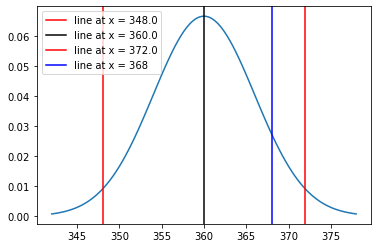

In [2]:
# importando as bilbiotecas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
import math

# definindo os dados
mu = 360
p=0.1
variance = p*( 1-p )
sigma = 6 
# coordenadas de x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plotando a curva normal
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# coordenadas de x
xcoords = [round(int_inferior,3),round(media,3),round(int_superior,3),assentos]
# cor das linhas
colors = ['r','k','r','b']
# plotando as linhas
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
# plotando as legendas
plt.legend()
plt.show()

## Teste de Hipótese Exemplo_2: NBA Salaries

### Lendo e tratando os dados

In [3]:
# importando as bibiotecas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# ignorando os warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [4]:
# lendo e armazenando os dados
#df = pd.read_csv(r'../../../data/NBA_season1718_salary.csv')

df_raw = pd.read_csv("http://www.dropbox.com/s/6roj44y5vek0fhi/NBA_season1718_salary.csv?dl=1",sep=',',encoding= 'latin1')
df=df_raw.copy()
df.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [5]:
# dropando a coluna ID
df = df.drop('Unnamed: 0',axis=1)

# renomeando as colunas
df.rename(columns={'season17_18': 'salary', 
                   'Tm': 'team', 
                   'Player': 'player'}, 
          inplace=True)

### Visualizando o número de contratos por time

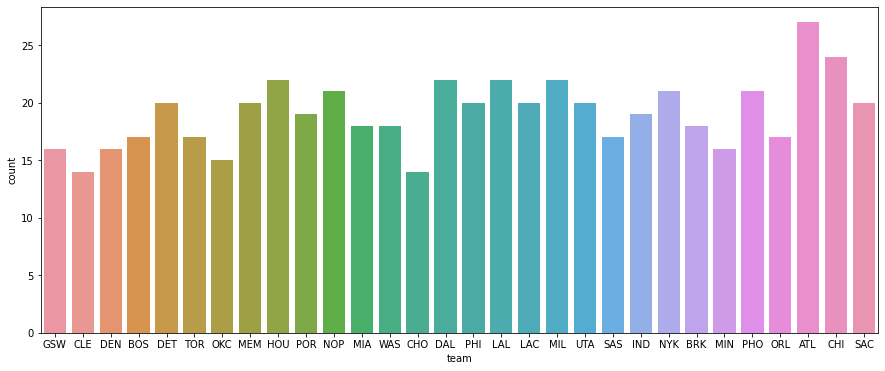

In [6]:
# plotando o número de contratos por time 
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(df.team)
plt.show()

### Visualizando o tipo de distribuição para os salários

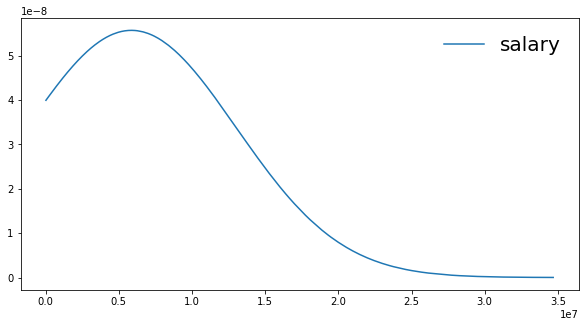

In [7]:
# plotando uma distribuição densidade de probabilidade para os salários

# criando uma figura com um gráfico 
fig, ax = plt.subplots(1, 1,figsize=(10,5))
# definindo os valores de x
x = df.salary
# calculando a média
mu = df.salary.mean()
# calculando o desvio padrão populacional
sigma = df.salary.std()
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x=x, loc=mu, scale=sigma),label='salary')
# imprimindo a legenda
ax.legend(loc='best', frameon=False,fontsize = 20)
# mostrando o gráfico
plt.show()

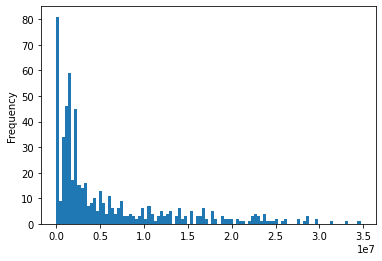

In [8]:
# plotando a distribuição da série de dados de salário
df['salary'].plot.hist(bins=100)

### Teste de Normalidade de Shapiro_Wilks

In [9]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(df['salary'])

(0.7648023962974548, 8.140026687905233e-28)

### Normalizando e Padronizando os dados

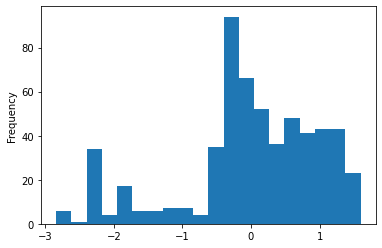

In [10]:
# aplicando o LOG na série de dados de salário e plotando uma distribuição
# transformação matemática de NORMALIZAÇÃO dos dados
df['log_salary'] = np.log(df['salary'])

# criando uma variável com o valor PADRONIZADO de log_salary
# valor PADRONIZADO significa subtrair a média e dividir pelo desvio padrão
df['normal_log_salary'] = ( df['log_salary'] - df['log_salary'].mean() ) / df['log_salary'].std()
df['normal_log_salary'].plot.hist(bins=20)

In [11]:
resultado_normal = stats.shapiro(df['normal_log_salary'])
resultado_normal

(0.9237819314002991, 1.923222188058779e-16)

### Cálculo do Z_Score

In [12]:
# definindo uma variável para os dados de salários transformados e normalizados
x = df['normal_log_salary']
# calculando a média
mu = np.mean(x)
# calculando o desvio-padrão populacional
std = np.std(x)
#Imprimindo a média e o desvio-padrão
round(mu,3),round(std,3)

(-0.0, 0.999)

In [13]:
# calculando o intervalo de confiança para os dados normalizados
# é esperado os valores de z_score
scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.9582529724421944, 1.95825297244215)

In [14]:
# armazenando os dados em variáveis 
Z_score_inf = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
Z_score_sup = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]
Z_score_inf,Z_score_sup

(-1.9582529724421944, 1.95825297244215)

### Inferência: Jogadores que ganham abaixo da média

In [15]:
# fazendo a inferência para os dados de normal_log_salario 
# para salários abaixo do limite inferior com 95% de confiança
df[df['normal_log_salary']<Z_score_inf]

,player,team,salary,log_salary,normal_log_salary
528,Demetrius Jackson,HOU,74159.0,11.213967,-1.988587
529,Georgios Papagiannis,POR,74159.0,11.213967,-1.988587
530,Larry Drew,NOP,74159.0,11.213967,-1.988587
531,Scotty Hopson,DAL,74159.0,11.213967,-1.988587
532,Isaiah Canaan,HOU,53465.0,10.886783,-2.179388
533,Tyler Cavanaugh,ATL,50000.0,10.819778,-2.218462
534,Kyle Collinsworth,DAL,50000.0,10.819778,-2.218462
535,Demetrius Jackson,HOU,50000.0,10.819778,-2.218462
536,Daniel Ochefu,WAS,50000.0,10.819778,-2.218462
537,Michael Young,WAS,50000.0,10.819778,-2.218462


In [16]:
# quantidade de jogadores abaixo da média com 95% de confiança
df[df['normal_log_salary']<Z_score_inf].shape

(45, 5)

In [17]:
# jogadores que ganham abaixo da média por time
df[df['normal_log_salary']<Z_score_inf]['team'].value_counts()

DAL    5
HOU    5
LAL    4
NOP    3
UTA    3
MIL    3
ATL    3
MEM    2
CHI    2
PHI    2
DET    2
WAS    2
ORL    1
BRK    1
MIA    1
LAC    1
IND    1
CLE    1
POR    1
NYK    1
TOR    1
Name: team, dtype: int64

Podemos concluir que temos 45 contratos abaixo da média.

### Inferência: Jogadores que ganham acima da média

In [18]:
# fazendo a inferência para os dados de normal_log_salario 
# para salários acima do limite superior
df[df['normal_log_salary']>Z_score_sup]

,player,team,salary,log_salary,normal_log_salary


Nenhum jogador ganha acima da média com um grau de confiança de 95%

In [19]:
# verificando os jogadores com melhores salários da liga
df.sort_values('normal_log_salary',ascending = False).head()

,player,team,salary,log_salary,normal_log_salary
0,Stephen Curry,GSW,34682550.0,17.361747,1.596555
1,LeBron James,CLE,33285709.0,17.320639,1.572582
2,Paul Millsap,DEN,31269231.0,17.258145,1.536138
3,Gordon Hayward,BOS,29727900.0,17.207597,1.506660
4,Blake Griffin,DET,29512900.0,17.200338,1.502427


#### Explorando o salário mais alto do DataSet

Como não temos jogadores com salário acima da média, vamos descobrir qual o nível de confiança necessário para o máximo salário

In [20]:
# Verificando o valor do Log salário normalizado para salário máximo
df['normal_log_salary'].max()

1.5965545045723402

In [21]:
# Cálculo do p-valor para o salário máximo
scipy.stats.norm(mu, std).sf(df['normal_log_salary'].max())

0.055027109914927784

In [22]:
# Cálculo do nível de confiança para o satário máximo
alpha_max = 1-scipy.stats.norm(mu, std).sf(df['normal_log_salary'].max())
alpha_max

0.9449728900850722

In [23]:
# imprimindo as conclusões 
print ('Temos 95% de certeza que não existe nenhum jogador ganhando mais que a média, com grau de confiança de 95%.\
 O jogador mais bem remunerado está com um nível de significância de', round(alpha_max*100,3), '%')

Temos 95% de certeza que não existe nenhum jogador ganhando mais que a média, com grau de confiança de 95%. O jogador mais bem remunerado está com um nível de significância de 94.497 %


-------------------

# 3. Classificação com Naive Bayes

O algoritmo “Naive Bayes” é um classificador probabilístico muito utilizado em machine learning. Baseado no “Teorema de Bayes”, o modelo foi criado por um matemático inglês, e também ministro presibiteriano, chamado Thomas Bayes (1701 – 1761) para tentar provar a existência de Deus.

Hoje é também utilizado na área de Aprendizado de Máquina (Machine Learning) para categorizar textos com base na frequência das palavras usadas.

Entre as possibilidades de aplicações está a classificação de um e-mail como SPAM ou Não-SPAM e a identificação de um assunto com base em seu conteúdo.

Ele recebe o nome de “naive” (ingênuo) porque desconsidera a correlação entre as variáveis (features). Ou seja, se determinada fruta é rotulada como “Limão”, caso ela também seja descrita como “Verde” e “Redonda”, o algoritmo não vai levar em consideração a correlação entre esses fatores. Isso porque trata cada um de forma independente.


## Aplicação do Naive Bayes

Frequentemente aplicado em processamento de linguagem natural e diagnósticos médicos, o método pode ser usado quando os atributos que descrevem as instâncias forem condicionalmente independentes. Ou seja, o teorema de Bayes trata sobre probabilidade condicional. Isto é, qual a probabilidade de o evento A ocorrer, dado o evento B.

Um problema simples que exemplifica bem o teorema é o cálculo de probabilidades em cima de diagnóstico de doenças.

Imagine que estamos trabalhando no diagnóstico de uma nova doença. Após realizar testes, coletas e análises com 100 pessoas distintas, descobrimos que 20 pessoas possuíam a doença (20%) e 80 pessoas estavam saudáveis (80%).

De todas as pessoas que possuíam a doença, 90% receberam Positivo no teste. Já 30% das pessoas que não possuíam a doença também receberam o teste positivo.


## Vamos para a tabulação dos dados:

- 100 pessoas realizaram o teste.
- 20% das pessoas que realizaram o teste possuíam a doença.
- 90% das pessoas que possuíam a doença, receberam positivo no teste.
- 30% das pessoas que não possuíam a doença, receberam positivo.

A partir destes dados, surge o problema: se uma nova pessoa realizar o teste e receber um resultado positivo, qual a probabilidade dela realmente possuir a doença?

Essa probabilidade a posteriori é resolvida pelo Naive Bayes. Para isso, é preciso multiplicar a probabilidade a priori (possuir a doença) pela probabilidade de “receber um resultado positivo, dado que tem a doença”.

Com esses dados, também podemos calcular a probabilidade a posteriori da negação (não possuir a doença, dado que recebeu um resultado positivo).



## Cálculo das Probabilidades Condicionais

P(doença|positivo) = 20% * 90%
P(doença|positivo) = 0,2 * 0,9
P(doença|positivo) = 0,18

P(não doença|positivo) = 80% * 30%
P(não doença|positivo) = 0,8 * 0,3
P(não doença|positivo) = 0,24

Finalizado o cálculo inicial, é preciso normalizar os dados, para que a soma das duas probabilidades resulte 100% ou 1. Para gerar os dados normalizados dividimos o resultado pela soma das duas probabilidades.

P(doença|positivo) = 0,18/(0,18+0,24) = 0,4285
P(não doença|positivo) = 0,24/(0,18+0,24) = 0,5714
0,4285 + 0,5714 = 0,9999.. (ou aproximadamente 1)

# Implementação em Python

Será utilizado o conjunto de dados IRIS, fornecido com a biblioteca Sckit-learn. O conjunto de dados contém 3 classes de 50 instâncias cada, em que cada classe se refere a um tipo de planta de íris. Aqui vamos usar o modelo GaussianNB, que já está disponível na Biblioteca Sckit-learn.

## Importando as bibliotecas e lendo os dados

In [24]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
#&amp;amp;nbsp;

dataset = datasets.load_iris()

### Visualização dos dados

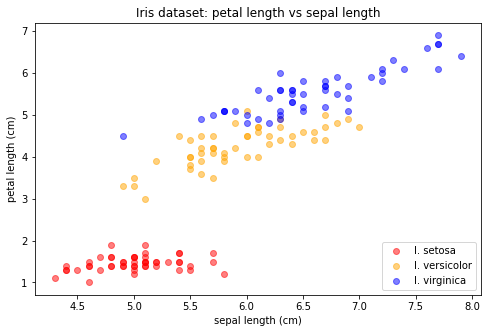

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))

iris_df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
iris_df['species'] = dataset['target']

colours = ['red', 'orange', 'blue']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='lower right')

plt.show()

# Naive Bayes com Sckit-learn

In [26]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)

GaussianNB(priors=None, var_smoothing=1e-09)

## Fazendo Predições

In [27]:
expected = dataset.target
predicted = model.predict(dataset.data)

## Imprimindo as Métricas

In [28]:
print(metrics.classification_report(expected, predicted))

print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# Teste A/B Bayesiano

Este é um exemplo onde onde o Teorema de Bayes se encontra com a probabilidade frequentista, ou o conceito de Inferência Estatística.

A diferença é que a abordagem Bayesiana traz uma comparação entre duas distribuições, o que amplia o poder de análise e tomada de decisão.

Dados da amostra: um teste A / B foi executado para verificar a taxa de conversão (CR, desde agora) de uma página da web, e os resultados estão na Tabela 1 abaixo.

<br>
<img src="img/data_img.png" width="300" />
<br>

A partir daí podemos calcular os valores que definem a diferença entre os dois grupos de Controle e Teste

In [29]:
from scipy.stats import beta
from calc_prob import calc_prob_between
#from calc_prob import calc_prob_between

#This is the known data: imporessions and conversions for the Control and Test set
imps_ctrl,convs_ctrl=16500, 30 
imps_test, convs_test=17000, 50

#here we create the Beta functions for the two sets
a_C, b_C = convs_ctrl, imps_ctrl-convs_ctrl
beta_C = beta(a_C, b_C)
a_T, b_T = convs_test, imps_test-convs_test
beta_T = beta(a_T, b_T)

#calculating the lift
lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()

#calculating the probability for Test to be better than Control
prob=calc_prob_between(beta_T, beta_C)

print (f"Test option lift Conversion Rates by {lift*100:2.2f}% with {prob*100:2.1f}% probability.")

Test option lift Conversion Rates by 61.76% with 98.3% probability.


# Como interpretar os resultados?

Segundo a abordagem Bayesiana, com base nos números da Tabela, a opção Test tem um desempenho muito melhor que o Control: cerca de 60% de aumento, com mais de 98% de probabilidade de ser melhor.

Estes são resultados puros, agnósticos. Se eles são bons ou não, depende da situação, mas falando em termos de probabilidade, qualquer coisa acima de 95% deve ser suficiente, o que acaba por estabelecer uma abordagem frequentista.

## Função para análise do Teste A/B

A resposta está em uma minúcia do teorema de Bayes. Sem entrar muito nos detalhes, geralmente as soluções para o teorema de Bayes são difíceis (se não impossíveis) de serem resolvidas exatamente, e é por isso que poucos métodos de aproximação foram desenvolvidos, como o Markov Chain Monte Carlo (MCMC). Você pode encontrar muitos artigos em torno da web que usam esses procedimentos.


Mas os testes A / B são um caso onde o Teorema de Bayes tem solução, na verdade, podemos ter uma solução exata com base no conceito de __[Conjuntos anteriores ou "Conjugate prior"](https://en.wikipedia.org/wiki/Conjugate_prior)__. Quando esse conceito é aplicável, a função posterior do teorema de Bayes fica na mesma família do anterior, e assim podemos construir a função final com um processo iterativo.

Os testes A / B são experimentos aleatórios com exatamente dois resultados possíveis, "converter" ou "não" e, como tal, são descritos como um estudo de Bernoulli, e a distribuição Beta é o conjugado anterior a esse processo. É por isso que podemos ousar usá-lo de maneira simples.

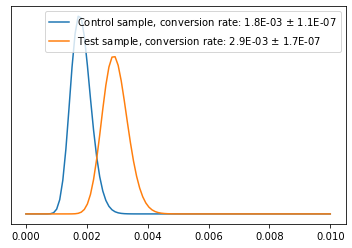

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def calc_beta_mode(a, b):
    '''this function calculate the mode (peak) of the Beta distribution'''
    return (a-1)/(a+b-2)

def plot(betas, names, linf=0, lsup=0.01):
    '''this function plots the Beta distribution'''
    x=np.linspace(linf,lsup, 100)
    for f, name in zip(betas,names) :
        y=f.pdf(x) #this for calculate the value for the PDF at the specified x-points
        y_mode=calc_beta_mode(f.args[0], f.args[1])
        y_var=f.var() # the variance of the Beta distribution
        plt.plot(x,y, label=f"{name} sample, conversion rate: {y_mode:0.1E} $\pm$ {y_var:0.1E}")
        plt.yticks([])
    plt.legend()
    plt.show()

plot([beta_C, beta_T], names=["Control", "Test"])

### Interpretação dos Resultados

Você pode notar que os picos das duas distribuições coincidem com os valores que você calcula da maneira clássica:

<br>
<img src="img/probs.png" width="200" />
<br>

Existe a Função de Densidade de Probabilidade (PDF) para as taxas de conversão (CRs), em vez de um número simples. E, graças a isso, você pode calcular, por exemplo, a variação (popularmente chamada de 'erro') nos CRs, que também é mostrada no rótulo dentro do gráfico.

## Abordagem Bayesiana


Uma forma de abordar a probabilidade condicional é calcular o que é chamado de "elevação", ou seja, quanto a opção Teste aumenta o CR em relação à Controle:

<br>
<img src="img/uplift.png" width="200" />
<br>



In [31]:
a_C, b_C, a_T, b_T

(30, 16470, 50, 16950)

In [32]:
CR_C = a_C / b_C
CR_T = a_T / b_T
print('Taxa de Conversão de Controle:', CR_C)
print('Taxa de Conversão de Teste:', CR_T)
print(50*'*')
uplift = (CR_T - CR_C) / CR_C
print('Melhora no Resultado:', uplift)

Taxa de Conversão de Controle: 0.0018214936247723133
Taxa de Conversão de Teste: 0.0029498525073746312
**************************************************
Melhora no Resultado: 0.6194690265486725


## Abordagem Frequentista: Inferência Estatística

Na abordagem frequentista, é feita uma inferênicia estatística sobre a média de conversão de uma modalidade (Control), sobre a outra modalidade (Test), e então o resultado é comparado com o p_Value (0.05).

In [33]:

from mpmath import betainc

p=betainc(a=a_T, b=b_T, x1=0.0018, x2=1, regularized=True)
p

mpf('0.99922309898147099')

### Interpretação dos Resultados

Segundo a estatística frequentista podemos concluir que as médias dos dois resultados de controle e de teste são estatísticamente diferentes, portanto é estatísticamente significativo adotar a grupo de Teste.

## Solução em Plot 3-D

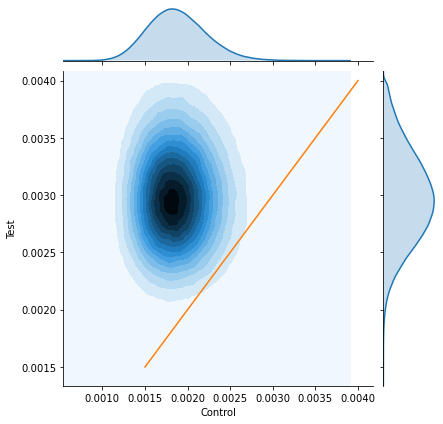

In [5]:
%%time
import seaborn as sns
import pandas as pd
import numpy as np
imps_ctrl,convs_ctrl=16500, 30 
imps_test, convs_test=17000, 50

#here we create the Beta functions for the two sets
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

val_C=np.random.beta(a_C, b_C, 1000000)
val_T=np.random.beta(a_T, b_T, 1000000)
vals=np.vstack([val_C, val_T]).T

limit=0.004


df=pd.DataFrame(vals, columns=['Control', 'Test'])
df=df[df['Control']<limit]
df=df[df['Test']<limit]
g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.0015, limit], [0.0015, limit])

Para aprofundar o conhecimento sobre o tema desta aula __[Bayesian Hypothesis Testing](https://www.probabilitycourse.com/chapter9/9_1_8_bayesian_hypothesis_testing.php)__

----------

# 4. Teorema de Bayes 

Classificação e previsão são dois dos aspectos mais importantes do Machine Learning e o Naive Bayes é um algoritmo simples, mas surpreendentemente poderoso para modelagem preditiva. Então pessoal, neste tutorial do Naive Bayes, serão abordados os seguintes tópicos:

- definição
- exemplo com baralho
- exemplo com predição do tempo para jogo de golf
- aplicações de mercado

## Definição 


### O que é Naive Bayes?

O Naive Bayes está entre um dos algoritmos mais simples, mas mais poderosos para classificação, com base no Teorema de Bayes, com uma suposição de independência entre os preditores. O modelo Naive Bayes é fácil de construir e particularmente útil para conjuntos de dados muito grandes. Existem duas partes nesse algoritmo:

- Ingênuo

- Bayes

O classificador Naive Bayes assume que a presença de um recurso em uma classe não está relacionada a nenhum outro recurso. Mesmo que esses recursos dependam um do outro ou da existência de outros recursos, todas essas propriedades contribuem independentemente para a probabilidade de que uma determinada fruta seja uma maçã, uma laranja ou uma banana, e é por isso que é conhecida como "ingênua".



### Teorema de Bayes

- O que é o teorema de Bayes?

Na teoria estatística e de probabilidade, o teorema de Bayes descreve a probabilidade de um evento, com base no conhecimento prévio de condições que podem estar relacionadas ao evento. Serve como uma maneira de descobrir a probabilidade condicional.

Dada uma hipótese (H) e evidência (E), o teorema de Bayes afirma que a relação entre a probabilidade da hipótese antes de obter a evidência, P (H) e a probabilidade da hipótese após a obtenção da evidência, P (H | E), é:

<br>
<br>
\begin{equation*}
P(Hipótese | Evento) = \dfrac{ P(Evento | Hipótese) . P(Hipótese) }{ P(Evento) }
\end{equation*}
<br>
<br>

- $ P(Hipótese | Evento) $: Probabilidade posterior, ou seja, probabilidade de evento após a evidência ser vista


- $ P(Hipótese) $: Probabilidade à priori ou a probabilidade anterior - probabilidade de evento antes da evidência ser vista


- $ P(Evento | Hipótese) $: Likelyhood (chance)


- $ \dfrac{ P(Evento | Hipótese) }{ P(Evento) } $: Likelyhood ratio (taxa de chance)


## Exemplo do Teorema de Bayes - Baralho de Cartas

<br>
<br>
\begin{equation*}
P(King | Face) = \dfrac{ P(Face | King) . P(King) }{ P(Face) }
\end{equation*}
<br>
<br>

Vamos supor que temos um baralho de cartas e desejamos descobrir a probabilidade da carta que escolhemos aleatoriamente ser um rei, já que é uma carta de face. Então, de acordo com o Teorema de Bayes, podemos resolver esse problema. Primeiro, precisamos descobrir a probabilidade:

- $P (rei)$: que é 4/52, pois há 4 reis em um baralho de cartas.
- $P (Face | Rei)$: é igual a 1, pois todos os Reis são cards de face.
- $P (Face)$: é igual a 12/52, pois existem 3 Face Cards em um naipe de 13 cartas e há 4 naipes no total.

Agora, reunindo todos os valores na equação de Bayes, obtemos um resultado de $P(King | Face) = 1/3$.


<br>
<img src="img/NB.gif" width=600>
<br>


## Exemplo do Teorema de Bayes - Teste Diagnóstico

Os diagramas de Venn são particularmente úteis para visualizar o teorema de Bayes, já que os diagramas e o teorema tratam de observar as interseções de diferentes espaços de eventos.

Uma doença está presente em 5 em cada 100 pessoas, e um teste com 90% de precisão (o que significa que o teste produz o resultado correto em 90% dos casos) é administrado a 100 pessoas. Se uma pessoa do grupo for positiva, qual é a probabilidade de essa pessoa ter a doença?

A resposta intuitiva é que a única pessoa tem 90% de probabilidade de ter a doença. Mas podemos visualizar isso para mostrar que não é preciso. Primeiro, desenhe a população total e as 5 pessoas que têm a doença:

<br>
<img src="img/bayes_diagnostic_1.png" width=400>
<br>



The circle A represents 5 out 100, or 5% of the larger universe of 100 people.

Next, overlay a circle to represent the people who get a positive result on the test. We know that 90% of those with the disease will get a positive result, so need to cover 90% of circle A, but we also know that 10% of the population who does not have the disease will get a positive result, so we need to cover 10% of the non-disease carrying population (the total universe of 100 less circle A).

<br>
<img src="img/bayes_diagnostic_2.png" width=400>
<br>

O círculo B cobre uma parcela substancial da população total. Na verdade, abrange mais área do que a parcela total da população com a doença. Isso ocorre porque 14 da população total de 100 (90% das 5 pessoas com a doença + 10% das 95 pessoas sem a doença) receberão um resultado positivo. Embora este seja um teste com precisão de 90%, esta visualização mostra que qualquer paciente que teste positivo (Círculo B) para a doença tem apenas 32,14% (4,5 em 14) de chance de realmente ter a doença.

## Exemplo do Teorema de Bayes - Jogo de Golf

Considere um conjunto de dados fictício que descreva as condições climáticas para jogar uma partida de golfe. Dadas as condições climáticas, cada tupla classifica as condições como adequadas (“Sim”) ou impróprias (“Não”) para jogar golfe.

Aqui está uma representação tabular do nosso conjunto de dados.

<br>
<img src="img/bayes_dataset.png" width=800>
<br>



O conjunto de dados é dividido em duas partes, a saber, matriz de recursos e o vetor de resposta.

A matriz de recursos contém todos os vetores (linhas) do conjunto de dados nos quais cada vetor consiste no valor dos recursos dependentes. No conjunto de dados acima, os recursos são "Outlook", "Temperatura", "Umidade" e "Com Vento".
O vetor de resposta contém o valor da variável de classe (previsão ou saída) para cada linha da matriz de recurso. No conjunto de dados acima, o nome da variável da classe é "Jogar golfe".
Suposição:

A suposição fundamental de Naive Bayes é que cada recurso faz uma contribuição para o resultado:

- independente
- igual


Com relação ao nosso conjunto de dados, esse conceito pode ser entendido como assumir que nenhum par de recursos é dependente. Por exemplo, a temperatura "quente" não tem nada a ver com a umidade ou a perspectiva de "chuvoso" não afeta os ventos. Portanto, os recursos são assumidos como independentes.

Em segundo lugar, cada recurso recebe o mesmo peso (ou importância). Por exemplo, conhecer apenas a temperatura e a umidade por si só não pode prever o resultado com precisão. Nenhum dos atributos é irrelevante e supõe-se que esteja contribuindo igualmente para o resultado.

Nota: As suposições feitas por Naive Bayes geralmente não são corretas em situações do mundo real. De fato, a suposição de independência nunca é correta, mas geralmente funciona bem na prática.

Agora, antes de passar para a fórmula de Naive Bayes, é importante conhecer o teorema de Bayes.


### Teorema de Bayes

O Teorema de Bayes encontra a probabilidade de um evento ocorrer, dada a probabilidade de outro evento que já ocorreu. O teorema de Bayes é declarado matematicamente como segue.

<br>
\begin{equation*}
P(y | X) = \dfrac{ P(X | y) . P(y) }{ P(X) }
\end{equation*}
<br>

onde y é variável de classe e X é um vetor de recurso dependente (de tamanho n) em que:

<br>
\begin{equation*}
X = (x_1, x_2, x_3, ... , x_n)
\end{equation*}
<br>



- Suposição ingênua

Agora, é hora de colocar uma suposição ingênua no teorema de Bayes, que é a independência entre os recursos. Então agora, dividimos as evidências em partes independentes. Agora, consideremos que os eventos são independentes.

<br>
\begin{equation*}
P(y | x_1, x_2, x_3, ... , x_n) = \dfrac{ P(x_1 | y) . P(x_2 | y) . P(x_3 | y) ... P(x_n | y) . P(y) }{ P(x_1).P(x_2).P(x_3) ... P(x_n) }
\end{equation*}
<br>

Então, finalmente, ficamos com a tarefa de calcular P (y) e P (xi | y). Observe que P (y) também é chamado de probabilidade de classe e P (xi | y) é chamado de probabilidade condicional. Os diferentes classificadores ingênuos de Bayes diferem principalmente pelas premissas que fazem sobre a distribuição de P (xi | y).

Vamos tentar aplicar a fórmula acima manualmente em nosso conjunto de dados climáticos. Para isso, precisamos fazer algumas pré-computações em nosso conjunto de dados. Precisamos encontrar P (xi | yj) para cada xi em X e yj em y. Todos esses cálculos foram demonstrados nas tabelas abaixo:

<br>
<img src="img/bayes_charts.png" width=500>
<br>


Portanto, na figura acima, calculamos 

<br>
\begin{equation*}
P(x_i | y_j)
\end{equation*}
<br>

para cada xi em X e yj em y manualmente nas tabelas 1-4. Por exemplo, probabilidade de jogar golfe, já que a temperatura é baixa, ou seja, 

<br>
\begin{equation*}
P (temp. = Frio | jogar golfe = Sim) = \dfrac{ 3 }{ 9 }
\end{equation*}
<br>

Além disso, precisamos encontrar probabilidades de classe (P (y)) que foram calculadas na tabela 5. Por exemplo, P (jogar golfe = Sim) = 9/14.

Então agora terminamos nossas pré-computações e o classificador está pronto! Vamos testá-lo em um novo conjunto de recursos (vamos chamá-lo hoje):

- **today = (Sunny, Hot, Normal, False)**

Portanto, a probabilidade de jogar golfe é dada por:

<br>
\begin{equation*}
P(Yes|today) = \dfrac{ P(SunnyOutlook|Yes).P(HotTemperature|Yes).P(NormalHumidity|Yes).P(NoWind|Yes).P(Yes) }{ P(today) }
\end{equation*}
<br>

and probability to not play golf is given by:

<br>
\begin{equation*}
P(No|today) = \dfrac{ P(SunnyOutlook|No).P(HotTemperature|No).P(NormalHumidity|No).P(NoWind|Yes).P(No) }{ P(today) }
\end{equation*}
<br>

Agora precisamos considerar que o total das probabilidades de jogar e não-jogar hoje é igual a 1:

<br>
\begin{equation*}
P(Yes|today) + P(No|today) = 1
\end{equation*}
<br>

# Golf: Aplicando o Teorema de Bayes (método raiz)

In [34]:
# Como P(today) é comum em ambas as probabilidades, podemos ignorar P(today) 
# vamos encontrar probabilidades proporcionais

P_Yes_today =  ( 3/9 * 2/9 * 6/9 * 6/9 * 9/14 ) / ( 5/14 * 4/14 * 7/14 * 8/14 )
P_No_today = ( 2/5 * 2/5 * 1/5 * 2/5 * 5/14 ) / ( 5/14 * 4/14 * 7/14 * 8/14 )

(P_Yes_today, P_No_today)

(0.7259259259259259, 0.1568)

In [35]:
# Esses números podem ser convertidos em probabilidade, tornando a soma igual a 1 (normalização):

P_Yes_today_norm = P_Yes_today / (P_Yes_today + P_No_today)
P_No_today_norm = P_No_today / (P_Yes_today + P_No_today)

(P_Yes_today_norm,P_No_today_norm)

(0.8223684210526315, 0.17763157894736842)

In [36]:
# Portanto, a previsão de que o golfe seria jogado é "Sim".
print(P_Yes_today_norm>P_No_today_norm)

True


## Teorema de Bayes: fórmulação original

Para que não seja necessária a normalização dos dadso, deve ser utilizada a formulaçãooriginal do Teorema de Bayes com segue:

<br>
\begin{equation*}
P(Yes|today)=\dfrac{P(SunnyOutlook|Yes).P(HotTemperature|Yes).P(NormalHumidity|Yes).P(NoWind|Yes).P(Yes)}
{P(SunnyOutlook|Yes).P(HotTemperature|Yes).P(NormalHumidity|Yes).P(NoWind|Yes).P(Yes)+SunnyOutlook| \sim Yes).P(HotTemperature| \sim Yes).P(NormalHumidity| \sim Yes).P(NoWind| \sim Yes).P( \sim Yes)}
\end{equation*}
<br>

In [37]:
# aplicando a fórmula original de Bayes apra o nosso problema

P_Yes_today_new = ( 3/9 * 2/9 * 6/9 * 6/9 * 9/14 ) / ( (3/9 * 2/9 * 6/9 * 6/9 * 9/14) + (2/5 * 2/5 * 1/5 * 2/5 * 5/14 ) )
P_Yes_today_new

0.8223684210526315

O método que discutimos acima é aplicável a dados discretos. No caso de dados contínuos, precisamos fazer algumas suposições sobre a distribuição dos valores de cada recurso. Os diferentes classificadores Naive Bayes diferem principalmente pelas premissas que fazem sobre a distribuição de $ P (x_i | y) $.


# Golf: Naive Bayes no Scikit Learn

### Definindo o DataSet

In [38]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
humidity=['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High']
windy=['False','True','False','False','False','True','True','False','False','False','True','True','False','True']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

### Fazendo o Encoding das variáveis

In [39]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print ("Weather:",weather_encoded)
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
# Converting string labels into numbers
print ("Temp:",temp_encoded)

# Converting string labels into numbers
humidity_encoded=le.fit_transform(humidity)
# Converting string labels into numbers
print ("Humidity:",humidity_encoded)

# Converting string labels into numbers
windy_encoded=le.fit_transform(windy)
# Converting string labels into numbers
print ("Windy:",windy_encoded)

# Converting string labels into numbers
label=le.fit_transform(play)
print ("Play:",label)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Windy: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


### Combinando as variáveis

In [40]:
#Combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded,humidity_encoded,windy_encoded))
print (features)

[(2, 1, 0, 0), (2, 1, 0, 1), (0, 1, 0, 0), (1, 2, 0, 0), (1, 0, 1, 0), (1, 0, 1, 1), (0, 0, 1, 1), (2, 2, 0, 0), (2, 0, 1, 0), (1, 2, 1, 0), (2, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (1, 2, 0, 1)]


### Implementando o Gaussian Naive Bayes

In [41]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2,0,0]]) # # Outlook:0(Overcast), Temp:2(Mild), Humidity:0(High), Windy:0(False)
print ("Predicted Value:", predicted)

Predicted Value: [1]


In [42]:
#Predict probability Output
predicted= model.predict_proba([[0,2,0,0]]) # Outlook:0(Overcast), Temp:2(Mild), Humidity:0(High), Windy:0(False)
print ("Predicted Value:", predicted)

Predicted Value: [[0.01265395 0.98734605]]


----------

# 4. Teorema de Bayes: Aplicação Prática

Até agora aplicamos o Teorema de Bayes para problemas binários. Vamos utilizar o DataSet de Vinhos do `Sklearn` para que possamos entender como o algoritmo `GaussianNB` é poderoso

## Importando e verificando os dados

In [43]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print data(feature)shape
wine.data.shape

(178, 13)

## Imprimindo as características dos dados

In [44]:
# print the names of the 13 features
print ("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print ("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


## Separando os dados em treino e teste

In [45]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, 
                                                    wine.target, 
                                                    test_size=0.3,
                                                    random_state=0) # 70% training and 30% test

## Classificador Gaussian Naive Bayes

No Nauss Bayes gaussiano, presume-se que os valores contínuos associados a cada recurso sejam distribuídos de acordo com uma distribuição gaussiana. Uma distribuição gaussiana também é chamada de distribuição normal. Quando plotado, ele fornece uma curva em forma de sino, que é simétrica sobre a média dos valores dos recursos, como mostrado abaixo:

<br>
<img src="img/gaussian_bayes.png" width=300>
<br>

A probabilidade dos recursos é assumida como gaussiana; portanto, a probabilidade condicional é dada por:


<br>
\begin{equation*}
P(x_i | y) = \dfrac{1}{\sqrt{2 \pi \sigma^²}} . e^ \dfrac{-(x-\mu)^2}{2 \sigma^2}
\end{equation*}
<br>


## Implementando o `GaussianNB`

In [46]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_train = gnb.predict(X_train)
y_pred = gnb.predict(X_test)

## Avaliando o modelo

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.9838709677419355
Test Accuracy: 0.9444444444444444


In [48]:
from sklearn.metrics import confusion_matrix

#labels = ['class_0', 'class_1', 'class_2']
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]


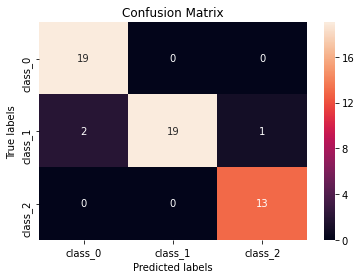

In [49]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['class_0', 'class_1', 'class_2']); ax.yaxis.set_ticklabels(['class_0', 'class_1', 'class_2']);

## Vantagens

- Não é apenas uma abordagem simples, mas também um método rápido e preciso de previsão.
- Naive Bayes tem custo de computação muito baixo.
- Ele pode trabalhar com eficiência em um grande conjunto de dados.
- Ele tem bom desempenho em caso de variável de resposta discreta em comparação com a variável contínua.
- Pode ser usado com vários problemas de previsão de classe.
- Ele também tem um bom desempenho no caso de problemas de análise de texto.
- Quando a suposição de independência se mantém, um classificador Naive Bayes tem melhor desempenho em comparação com outros modelos, como a regressão logística.

## Desvantagens

- A suposição de características independentes. Na prática, é quase impossível que o modelo obtenha um conjunto de preditores que sejam totalmente independentes.
- Se não houver tupla de treinamento de uma classe específica, isso causa uma probabilidade posterior nula. Nesse caso, o modelo não pode fazer previsões. Esse problema é conhecido como Problema de Probabilidade / Frequência Zero.

---------

# 5. Prática de Naive Bayes

Acesse os trabalhos com __[Naive Bayes](https://www.kaggle.com/tags/naive-bayes)__ do site do Kaggle.